In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pdb
#from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
#import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import numpy.ma as ma
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec # GRIDSPEC !
from matplotlib.colorbar import Colorbar 

In [2]:
gsw.CT_from_t(34, 15, 10000)

13.138420902310283

In [3]:
import fiona
import matplotlib

<IPython.core.display.Javascript object>


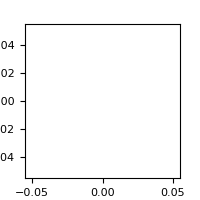

In [52]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

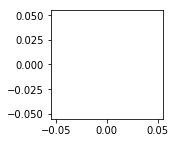

In [44]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [ ]:
dfmg = pd.read_csv("dfmg_corrected_DIST_IS_GL.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [5]:
import plot_stations as pltStn
import importlib
importlib.reload(pltStn)

import plot_bathy as pltBathy
import importlib
importlib.reload(pltBathy)

import find_depth_averages_v2 as averageProfile
import plot_var_contours_with_distance as plt2dDepthVsDist

import plot_station_bot_sal as pbs

#import plot_topView_contourf as topView
#importlib.reload(topView)

import plot_monthly_count as monthCount
importlib.reload(monthCount)

import plot_profiles_vs_dist as profDist

import plot_Profiles_vs_time as profile2dTime

import plotProfileNumber as viewProf

In [6]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_GLINE'] <= 50
gline_le_100km = dfmg['DIST_GLINE'] <= 100
gline_le_150km = dfmg['DIST_GLINE'] <= 150
gline_le_25km = dfmg['DIST_GLINE'] <= 25
gline_le_75km = dfmg['DIST_GLINE'] <= 75

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [7]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [8]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def sel_years(df, years=[2011]):
    return df['JULD'].dt.year.isin(years)
    
def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [9]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.4) & (dfmg.CTEMP <= -1.8)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [10]:
salrange = list(np.arange(33.5, 35.05, 0.01))
salrange_disc = list(np.arange(33.5, 35.05, 0.1))
thetarange = list(np.arange(-3, 1, 0.01))
thetarange_disc = list(np.linspace(-3, 1, 10))
RossYears = [2010, 2011, 2012, 2014]
WeddellYears= [2007, 2009, 2011]
PrydzYears = [2011, 2012, 2013, 2015]

In [11]:
def count_months(ydf):
    uniqueProfsIndices = ydf.groupby("PROFILE_NUMBER").tail(1).index
    
    return ydf.loc[uniqueProfsIndices].groupby(pd.cut(ydf.loc[uniqueProfsIndices].JULD.dt.month, 
                                                      np.arange(0,13,1))).JULD.count().values

In [12]:
def plot_timeHist(df):
    years = np.sort(df.JULD.dt.year.unique())
    months = list(np.arange(1,13,1)) * len(years)
    monthCount = count_months(df)
    

In [12]:
years = np.sort(dfmg.JULD.dt.year.unique())
print(years)
monthCount = np.stack(dfmg.groupby(pd.cut(dfmg.JULD.dt.year, years)).apply(count_months) )

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]


In [13]:
winds = []
with open("../../../Winds/list_files.txt") as file_list:
    for line in file_list:
        winds.append(xr.open_dataset("../../../Winds/ERA_interim/"+line.split("\n")[0]))

In [14]:
windsMerged = xr.merge(winds)

In [13]:
windsMerged = xr.open_mfdataset("/media/data/Datasets/Winds/ERA_interim/*.nc")

In [14]:
windsMergedSH = windsMerged.sel(latitude=slice(-60, -89.25))

In [15]:
windsMergedSH

<xarray.Dataset>
Dimensions:    (latitude: 40, longitude: 480, time: 168)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 -60.0 -60.75 -61.5 ... -87.75 -88.5 -89.25
  * time       (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2017-12-01
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<shape=(168, 40, 480), chunksize=(12, 40, 480)>
    v10        (time, latitude, longitude) float32 dask.array<shape=(168, 40, 480), chunksize=(12, 40, 480)>
    iews       (time, latitude, longitude) float32 dask.array<shape=(168, 40, 480), chunksize=(12, 40, 480)>
    inss       (time, latitude, longitude) float32 dask.array<shape=(168, 40, 480), chunksize=(12, 40, 480)>
Attributes:
    Conventions:  CF-1.6
    history:      2018-09-18 06:09:01 GMT by grib_to_netcdf-2.8.0: grib_to_ne...

In [18]:
def compute_stress_curl(windsMergedSH):
    stress_curl = np.zeros_like(windsMergedSH.u10)
    wek = np.zeros_like(windsMergedSH.u10)
    rho0 = 1025
    tauy_x = np.zeros_like(windsMergedSH.u10)
    taux_y = np.zeros_like(windsMergedSH.u10)
    
    delta_lat = abs(float(windsMergedSH.latitude[0] - windsMergedSH.latitude[1]))
    delta_lon = abs(float(windsMergedSH.longitude[0] - windsMergedSH.longitude[1]))
    r = 6371e3 # radius of earth in metres
    dy = float(r * np.deg2rad(windsMergedSH.latitude[0] - windsMergedSH.latitude[1]))
    omega = 2*np.pi/(24.*3600)
    f = 2. * omega * np.sin(np.deg2rad(windsMergedSH.latitude.values))
    time_counter = 0
    for t in windsMergedSH.time:
    
        lat_counter = 0
        for lat in windsMergedSH.latitude:
            
            dx = float(r * np.cos(np.deg2rad(lat) ) * delta_lon)
        
            tauy_x[time_counter, lat_counter] = np.gradient(windsMergedSH.sel(time = t, latitude=lat).inss , dx)
            lat_counter+=1
        _, taux_y[time_counter] = np.gradient(windsMergedSH.sel(time = t).iews , dx, dy)
        stress_curl[time_counter] = tauy_x[time_counter] - taux_y[time_counter]
        
        for l in range(len(windsMergedSH.latitude)):
            wek[time_counter, l] = stress_curl[time_counter, l] / (f[l] * rho0)
        time_counter += 1
    
    
    windEk = xr.Dataset({'stressCurl':(['time', 'latitude', 'longitude'], stress_curl), 
                         'wek':(['time', 'latitude', 'longitude'], wek) }, 
                        coords={'time': windsMergedSH.time, 'latitude': windsMergedSH.latitude, 
                               'longitude': windsMergedSH.longitude})
    return windEk

In [19]:
windEk = compute_stress_curl(windsMergedSH)

In [15]:
windEk = xr.open_dataset("/media/data/Datasets/Winds/wek_ERA_interim_2004_2017.nc")

In [16]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/km/anaconda3/envs/pyocean35/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/km/anaconda3/envs/pyocean35/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


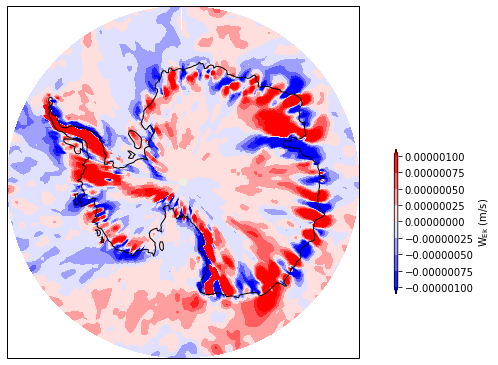

In [26]:
plt.close(1)
fig = plt.figure(1, figsize=(7,7))
gs = gridspec.GridSpec(5, 2, height_ratios=[1]*5, width_ratios=[1, 0.01])
mapax = plt.subplot(gs[:,0], projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90))
CF = mapax.contourf(windEk.longitude, windEk.latitude, windEk.wek.sel(time="2008-05-01"), vmin=-1e-6, vmax=1e-6, 
                   extend="both", cmap="bwr", levels=np.linspace(-1e-6, 1.0001e-6, 9), 
                    transform=ccrs.PlateCarree())
colorax = plt.subplot(gs[2:4,1])
Colorbar(ax= colorax, mappable=CF, label="W$_{\mathrm{Ek}}$ (m/s)")
#mapax.set_extent([-180, 180, -89, -50])
mapax.add_feature(cfeature.LAND)
mapax.coastlines()

plt.show()

In [163]:
windEk.longitude[-1]

<xarray.DataArray 'longitude' ()>
array(359.25, dtype=float32)
Coordinates:
    longitude  float32 359.25
Attributes:
    units:      degrees_east
    long_name:  longitude

# Slope Front Analysis

In [17]:
acrossASF = pd.read_excel("AcrossSlopeTransects.xlsx")

In [18]:
bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')

In [19]:
importlib.reload(topView)

NameError: name 'topView' is not defined

In [19]:
import plot_AcrossASF as pltASF
importlib.reload(pltASF)

<module 'plot_AcrossASF' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_AcrossASF.py'>

In [23]:
for i in range(0, len(acrossASF)):
    try:
        region=acrossASF.loc[i].REGION
        print(i)
        pltASF.plot_AcrossASF(acrossASF.loc[i], dfmg, windsMergedSH, windEk, bathy=bathy, region=region, 
                              wd=7, ht=5, show=False, savefig=True,
                         p2pdist=True, savename="./Images/acrossASF/acASF_"+region+"_"+str(i)+".png", levels=[])
    except:
        print("failed, ", i)

153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213


/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
failed,  252
253
254
failed,  254
255
failed,  255
256
257
258
259
260
261
failed,  261
262


In [29]:
importlib.reload(pltASF)

<module 'plot_AcrossASF' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_AcrossASF.py'>

(102,)


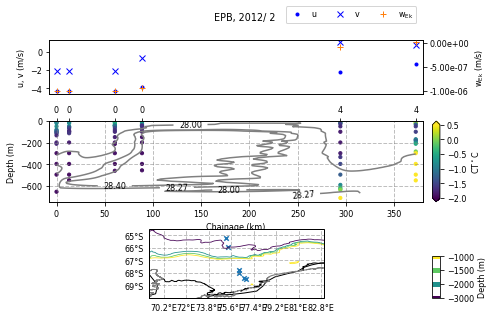

In [30]:
i = 86
region = acrossASF.loc[i].REGION
pltASF.plot_AcrossASF(acrossASF.loc[i], dfmg, windsMergedSH, windEk, bathy=bathy, region=region, 
                      wd=7, ht=5, show=1, savefig=1,p2pdist=True,
                      savename="./Images/acrossASF/acASF_"+region+"_"+str(i)+"_new.png", 
                      levels=[28, 28.27, 28.4]) 
#[28, 28.1, 28.27, 28.3, 28.4, 28.5, 28.6, 28.7]

#### computing the monthly mean winds at the slope and adding that to the acrossASF dataframe

In [32]:
acrossASF.zonal = np.zeros(len(acrossASF), dtype='object')
acrossASF['zonal'] = acrossASF.zonal.astype(object)
acrossASF.merid = np.zeros(len(acrossASF), dtype='object')
acrossASF['merid'] = acrossASF.merid.astype(object)
acrossASF.wek = np.zeros(len(acrossASF), dtype='object')
acrossASF['wek'] = acrossASF.wek.astype(object)
acrossASF.echodepth = np.zeros(len(acrossASF), dtype='object')
acrossASF['echodepth'] = acrossASF.echodepth.astype(object)
acrossASF['SHELF_BREAK_ind'] = np.zeros(len(acrossASF))
acrossASF['SHELF_BREAK_ind'] = acrossASF.echodepth.astype(object)

In [43]:
for i in range(0, len(acrossASF), 1):
    acASF = acrossASF.loc[i]
    profs = acASF.PROFILE_NUMBERS
    profs = [int(x) for x in profs.split(',')]
    year = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[0]]), "JULD"].dt.year.values[0]
    month = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[0]]), "JULD"].dt.month.values[0]
    region = acASF.REGION

    ctemps = []
    latlons = []
    depth = []
    gamman = []
    echodepth = []
    dist_gline = []
    zonal = []
    merid = []
    stress_curl = []
    wek = []
    no_of_days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    for j in range(len(profs)):
        dfSelect = dfmg.PROFILE_NUMBER.isin([profs[j]])
        ctemps = np.concatenate((ctemps, dfmg.loc[dfSelect, "CTEMP"].values))
        latlons.append([dfmg.loc[dfSelect, 'LATITUDE'].values[0], dfmg.loc[dfSelect, 'LONGITUDE'].values[0] ])
        wind_lons = dfmg.loc[dfSelect, 'LONGITUDE'].values[0]
        if wind_lons < 0:
            wind_lons = wind_lons + 360
        stress_curl.append(windEk.stressCurl.sel(time=str(year)+"-{0:-02d}".format(month)+"-01", latitude=dfmg.loc[dfSelect, 'LATITUDE'].values[0], longitude=wind_lons, method='nearest') )
        wek.append(np.asscalar(windEk.sel(time=slice(str(year)+"-{0:-02d}".format(month)+"-01", str(year)+"-{0:-02d}".format(month)+"-"+str(no_of_days[month-1]))).mean(dim=["time"]).wek.sel(latitude=dfmg.loc[dfSelect, 'LATITUDE'].values[0], longitude= wind_lons, method='nearest').values ))
        zonal.append(np.asscalar(windsMergedSH.sel(time=slice(str(year)+"-{0:-02d}".format(month)+"-01", str(year)+"-{0:-02d}".format(month)+"-"+str(no_of_days[month-1]))).mean(dim=["time"]).u10.sel(latitude=dfmg.loc[dfSelect, 'LATITUDE'].values[0], longitude= wind_lons, method='nearest').values ))
        merid.append(np.asscalar(windsMergedSH.sel(time=slice(str(year)+"-{0:-02d}".format(month)+"-01", str(year)+"-{0:-02d}".format(month)+"-"+str(no_of_days[month-1]))).mean(dim=["time"]).v10.sel(latitude=dfmg.loc[dfSelect, 'LATITUDE'].values[0], longitude= wind_lons, method='nearest').values ))
        depth = np.concatenate((depth,dfmg.loc[dfSelect, "DEPTH"].values))
        gamman = np.concatenate((gamman, dfmg.loc[dfSelect, "gamman"].values))
        echodepth = np.append(echodepth, dfmg.loc[dfSelect].ECHODEPTH.values[0])
    
    slope_labels = np.zeros(len(echodepth), dtype=int)
    slope_labels[echodepth > -1000] = 0
    slope_labels[(echodepth < -1000) & (echodepth > -1500) ] = 1
    slope_labels[(echodepth < -1500) & (echodepth > -2000) ] = 2
    slope_labels[(echodepth < -2000) & (echodepth > -3000) ] = 3
    slope_labels[(echodepth < -3000) ] = 4

    acrossASF.at[i, "zonal"] = zonal
    acrossASF.at[i, "merid"] = merid
    acrossASF.at[i, "wek"] = wek
    acrossASF.at[i, "echodepth"] = echodepth
    try:
        acrossASF.at[i, "SHELF_BREAK_ind"] = np.argwhere(echodepth <= -1000)[0][0]
    except:
        acrossASF.at[i, "SHELF_BREAK_ind"] = np.nan

In [51]:
acrossASF.to_excel("AcrossSlopeTransects.xlsx")

In [52]:
acrossASF.columns

Index(['REGION', 'PROFILE_NUMBERS', 'POSITION_LABEL', 'LEVELS', 'month',
       'zonal', 'merid', 'wek', 'echodepth', 'SHELF_BREAK_ind'],
      dtype='object')

In [79]:
#dfsel = ~acrossASF.SHELF_BREAK_ind.isnull()
b_zonal = []
b_merid = []
b_wek = []
b_lat = []
b_lon = []

b_28_d = []
b_2827_d = []
b_gt_2827_d = []

b_28_CT = []
b_2827_CT = []
b_gt_2827_CT = []

for i in range(0, len(acrossASF)):
    profs = acrossASF.iloc[i].PROFILE_NUMBERS
    profs = [int(x) for x in profs.split(',')]
    
    try:
        sbiind = int(acrossASF.iloc[i].SHELF_BREAK_ind)
    except:
        sbiind = acrossASF.iloc[i].SHELF_BREAK_ind
    
    if np.isnan(sbiind):
        b_zonal.append(np.nan)
        b_merid.append(np.nan)
        b_wek.append(np.nan)
        b_lat.append(np.nan)
        b_lon.append(np.nan)
        b_28_d.append(np.nan)
        b_2827_d.append(np.nan)
        b_gt_2827_d.append(np.nan)
        b_28_CT.append(np.nan)
        b_2827_CT.append(np.nan)
        b_gt_2827_CT.append(np.nan)
    else:
        b_zonal.append(float(acrossASF.iloc[i].zonal[sbiind]))
        b_merid.append(acrossASF.iloc[i].merid[sbiind])
        b_wek.append(acrossASF.iloc[i].wek[sbiind])
        b_lat.append(dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[sbiind]])].LATITUDE.values[0])
        b_lon.append(dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[sbiind]])].LONGITUDE.values[0])
        
        profBool = dfmg.PROFILE_NUMBER.isin([profs[sbiind]])
        b_gamman = dfmg.loc[profBool, 'gamman'].values
        b_CT = dfmg.loc[profBool, 'CTEMP'].values
        b_depths = dfmg.loc[profBool, 'DEPTH'].values
        
        try:
            b_28_d.append(b_depths[b_gamman >=28][0])
        except:
            b_28_d.append(np.nan)
            
        try:
            b_2827_d.append(b_depths[(b_gamman >28.1) & (b_gamman <= 28.27)][-1])
        except:
            b_2827_d.append(np.nan)
            
        try:
            b_gt_2827_d.append(b_depths[b_gamman > 28.27][0])
        except:
            b_gt_2827_d.append(np.nan)
            
        try:
            b_28_CT.append(b_CT[b_gamman >=28][0])
        except:
            b_28_CT.append(np.nan)
            
        try:
            b_2827_CT.append(b_CT[(b_gamman >28.1) & (b_gamman <= 28.27)][-1])
        except:
            b_2827_CT.append(np.nan)
            
        try:
            b_gt_2827_CT.append(b_CT[b_gamman > 28.27][0])
        except:
            b_gt_2827_CT.append(np.nan)
        
acrossASF.break_zonal = b_zonal
acrossASF.break_merid = b_merid
acrossASF.break_wek = b_wek
acrossASF.break_latitude = b_lat
acrossASF.break_longitude = b_lon

acrossASF.break_28_depth = b_28_d
acrossASF.break_2827_depth = b_2827_d
acrossASF.break_gt_2827_depth = b_gt_2827_d

acrossASF.break_28_CT = b_28_CT
acrossASF.break_2827_CT = b_2827_CT
acrossASF.break_gt_2827_CT = b_gt_2827_CT

In [57]:
28.27 + 0.05

28.32

In [70]:
acrossASF.columns

Index(['REGION', 'PROFILE_NUMBERS', 'POSITION_LABEL', 'LEVELS', 'month',
       'zonal', 'merid', 'wek', 'echodepth', 'SHELF_BREAK_ind', 'break_zonal',
       'break_merid', 'break_wek', 'break_longitude', 'break_latitude',
       'break_28_depth', 'break_2827_depth', 'break_gt_2827_depth',
       'break_28_CT', 'break_2827_CT', 'break_gt_2827_CT'],
      dtype='object')

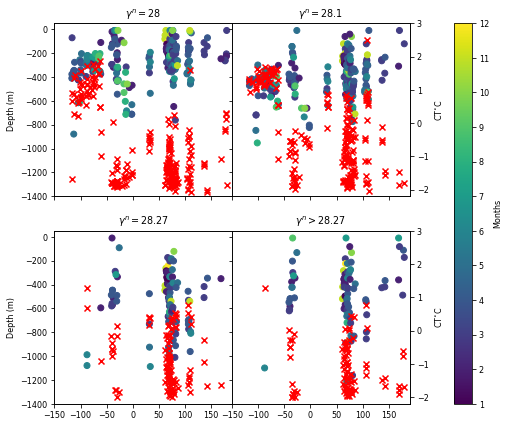

In [353]:
matplotlib.rcParams.update({'font.size': 8})    
plt.close(1)
plt.figure(1, figsize=(7.48, 7))
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1,0.25, 0.1], wspace=0, )
ax = []
axr = []

ax.append(plt.subplot(gs[0,0]))
axr.append(ax[-1].twinx())
axr[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_28_CT, c= 'r', marker = 'x')
SCR = ax[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_28_depth, c= acrossASF.month, cmap="viridis", 
                    vmin=1, vmax=12)

ax.append(plt.subplot(gs[0,1]))
axr.append(ax[-1].twinx())
axr[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_281_CT, c= 'r', marker = 'x')
ax[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_281_depth, c= acrossASF.month, cmap="viridis",
              vmin=1, vmax=12)

ax.append(plt.subplot(gs[1,0]))
axr.append(ax[-1].twinx())
axr[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_2827_CT, marker='x', color='r')
ax[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_2827_depth, c=acrossASF.month, cmap="viridis",
              vmin=1, vmax=12)

ax.append(plt.subplot(gs[1,1]))
axr.append(ax[-1].twinx())
axr[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_gt_2827_CT, marker='x', color='r')
ax[-1].scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_gt_2827_depth, marker='o', c=acrossASF.month, cmap="viridis",
              vmin=1, vmax=12)


subplot_titles = ["$\gamma^n=28$", "$\gamma^n=28.1$", "$\gamma^n=28.27$", "$\gamma^n>28.27$"]
for i in range(0,4,1):
    ax[i].set_ylim(-1400, 50)
    ax[i].set_xlim(-150, 190)
    axr[i].set_ylim(-2.2, 3)
    ax[i].set_title(subplot_titles[i])
for i in range(1,4, 2):
    ax[i].set_yticklabels([])
    ax[i].set_ylabel("")
    axr[i].set_ylabel("CT$^{\circ}$C")
for i in range(0,4,2):
    ax[i].set_ylabel("Depth (m)")
    axr[i].set_yticklabels([])
    axr[i].set_ylabel("")
for i in range(2):
    ax[i].set_xticklabels([])
    ax[i].set_xlabel("")

ax_colorbar = plt.subplot(gs[:, 3])
cbr = Colorbar(ax = ax_colorbar, mappable = SCR, orientation = 'vertical', ticks=np.arange(1,13))
cbr.ax.set_ylabel("Months")

plt.savefig("./Images/slopeFront/gn_depth_CT.png", dpi=300, bbox_inches="tight")
plt.show()

In [410]:
lon_grid.shape

(12, 1000)

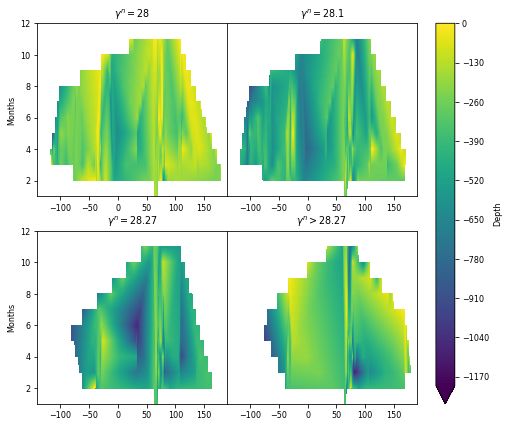

In [357]:
matplotlib.rcParams.update({'font.size': 8})    
plt.close(1)
plt.figure(1, figsize=(7.48, 7))
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1,0.1, 0.1], wspace=0,  )
ax = []
axr = []
levs = np.arange(-1200, 0.1, 10)

items = [acrossASF.break_28_depth, acrossASF.break_281_depth, acrossASF.break_2827_depth, acrossASF.break_gt_2827_depth]
count = 0
for element in items:
    dfsel = ~element.isnull() & ~acrossASF.SHELF_BREAK_LONGITUDE.isnull() & ~acrossASF.month.isnull()
    lon_line = np.linspace(-180, 180.0000000001, 1000)
    month_line = np.arange(1,13,1)
    lon_grid, month_grid = np.meshgrid(lon_line, month_line)
    gnDepth_gridded = griddata(np.array([acrossASF[dfsel].SHELF_BREAK_LONGITUDE, acrossASF[dfsel].month]).T, 
                           element[dfsel], (lon_grid, month_grid))
    ax.append(plt.subplot(gs[count//2, count%2]))
    CF = ax[-1].contourf(lon_grid, month_grid, gnDepth_gridded, cmap="viridis", vmin=-1200, vmax=0, extend='min', 
                         levels=levs)
    count+=1

subplot_titles = ["$\gamma^n=28$", "$\gamma^n=28.1$", "$\gamma^n=28.27$", "$\gamma^n>28.27$"]

ax_colorbar = plt.subplot(gs[:, 3])
cbr = Colorbar(ax = ax_colorbar, mappable = CF, orientation = 'vertical')
cbr.ax.set_ylabel("Depth")

subplot_titles = ["$\gamma^n=28$", "$\gamma^n=28.1$", "$\gamma^n=28.27$", "$\gamma^n>28.27$"]
for i in range(4):
    ax[i].set_xlim(-140, 190)
    ax[i].set_title(subplot_titles[i])
for i in range(1,4,2):
    ax[i].set_yticklabels("")
    ax[i].set_yticks([])
    ax[i-1].set_ylabel("Months")
for i in range(2):
    #ax[i].set_xticklabels("")
    #ax[i].set_xticks([])
    pass

plt.savefig("./Images/slopeFront/gnDepthHovmoller.png", dpi=300, bbox_inches="tight")
plt.show()

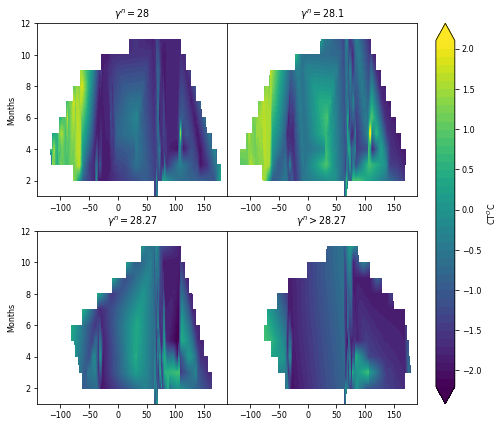

In [367]:
matplotlib.rcParams.update({'font.size': 8})    
plt.close(1)
plt.figure(1, figsize=(7.48, 7))
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1,0.1, 0.1], wspace=0,  )
ax = []
axr = []
levs = np.arange(-2.2, 2.1, 0.1)

items = [acrossASF.break_28_CT, acrossASF.break_281_CT, acrossASF.break_2827_CT, acrossASF.break_gt_2827_CT]
count = 0
for element in items:
    dfsel = ~element.isnull() & ~acrossASF.SHELF_BREAK_LONGITUDE.isnull() & ~acrossASF.month.isnull()
    lon_line = np.linspace(-180, 180.0000000001, 1000)
    month_line = np.arange(1,13,1)
    lon_grid, month_grid = np.meshgrid(lon_line, month_line)
    gnDepth_gridded = griddata(np.array([acrossASF[dfsel].SHELF_BREAK_LONGITUDE, acrossASF[dfsel].month]).T, 
                           element[dfsel], (lon_grid, month_grid))
    ax.append(plt.subplot(gs[count//2, count%2]))
    CF = ax[-1].contourf(lon_grid, month_grid, gnDepth_gridded, cmap="viridis", vmin=-2.2, vmax=2.1, extend='both', levels=levs)
    count+=1

subplot_titles = ["$\gamma^n=28$", "$\gamma^n=28.1$", "$\gamma^n=28.27$", "$\gamma^n>28.27$"]

ax_colorbar = plt.subplot(gs[:, 3])
cbr = Colorbar(ax = ax_colorbar, mappable = CF, orientation = 'vertical')
cbr.ax.set_ylabel("CT$^{O}$C")

subplot_titles = ["$\gamma^n=28$", "$\gamma^n=28.1$", "$\gamma^n=28.27$", "$\gamma^n>28.27$"]
for i in range(4):
    ax[i].set_xlim(-140, 190)
    ax[i].set_title(subplot_titles[i])
for i in range(1,4,2):
    ax[i].set_yticklabels("")
    ax[i].set_yticks([])
    ax[i-1].set_ylabel("Months")
for i in range(2):
    #ax[i].set_xticklabels("")
    #ax[i].set_xticks([])
    pass
plt.savefig("./Images/slopeFront/gnCT_Hovmoller.png", dpi=300, bbox_inches="tight")
plt.show()

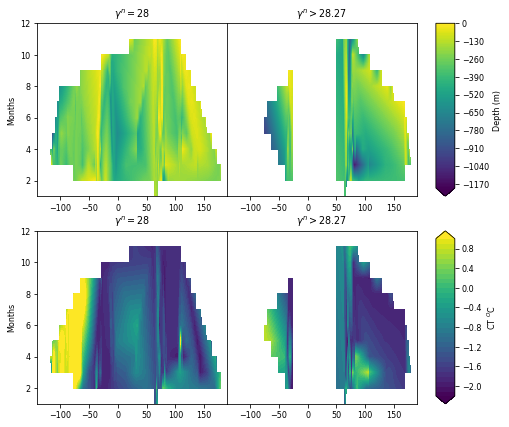

In [404]:
matplotlib.rcParams.update({'font.size': 8})    
plt.close(1)
plt.figure(1, figsize=(7.48, 7))
gs = gridspec.GridSpec(2, 4, width_ratios=[1,1,0.1, 0.1], wspace=0,  )
ax = []
axr = []
levs = [np.arange(-1200, 0.1, 10), np.arange(-2.2, 1.1, 0.1)]

items = [acrossASF.break_28_depth, acrossASF.break_gt_2827_depth, acrossASF.break_28_CT, acrossASF.break_gt_2827_CT]
count = 0
vmin=[-1200, -2.2]
vmax = [0.1, 1.1]
extend = ['min', 'both']
CF = []
for element in items:
    dfsel = ~element.isnull() & ~acrossASF.SHELF_BREAK_LONGITUDE.isnull() & ~acrossASF.month.isnull()
    lon_line = np.linspace(-180, 180.0000000001, 1000)
    month_line = np.arange(1,13,1)
    lon_grid, month_grid = np.meshgrid(lon_line, month_line)
    gnDepth_gridded = griddata(np.array([acrossASF[dfsel].SHELF_BREAK_LONGITUDE, acrossASF[dfsel].month]).T, 
                           element[dfsel], (lon_grid, month_grid), method='linear')
    if((count == 1) | (count == 3) ):
        gnDepth_gridded = ma.masked_array(np.array(gnDepth_gridded), mask = (lon_grid>-26.1) & (lon_grid<50))
    ax.append(plt.subplot(gs[count//2, count%2]))
    CF.append(ax[-1].contourf(lon_grid, month_grid, gnDepth_gridded, cmap="viridis", vmin=vmin[count//2], 
                              vmax=vmax[count//2], extend=extend[count//2], levels=levs[count//2]))
    count+=1

subplot_titles = ["$\gamma^n=28$", "$\gamma^n>28.27$", "$\gamma^n=28$", "$\gamma^n>28.27$"]

ax_colorbar1 = plt.subplot(gs[0, 3])
cbr = Colorbar(ax = ax_colorbar1, mappable = CF[0], orientation = 'vertical')
cbr.ax.set_ylabel("Depth (m)")

ax_colorbar2 = plt.subplot(gs[1, 3])
cbr = Colorbar(ax = ax_colorbar2, mappable = CF[2], orientation = 'vertical')
cbr.ax.set_ylabel("CT $^O$C")


for i in range(4):
    ax[i].set_xlim(-140, 190)
    ax[i].set_title(subplot_titles[i])
for i in range(1,4,2):
    ax[i].set_yticklabels("")
    ax[i].set_yticks([])
    ax[i-1].set_ylabel("Months")
for i in range(2):
    #ax[i].set_xticklabels("")
    #ax[i].set_xticks([])
    pass
plt.savefig("./Images/slopeFront/gnCT_and_Depth_Hovmoller.png", dpi=300, bbox_inches="tight")
plt.show()

In [406]:
acrossASF.break_28_depth.corr(acrossASF.break_28_CT)

-0.224741415316227

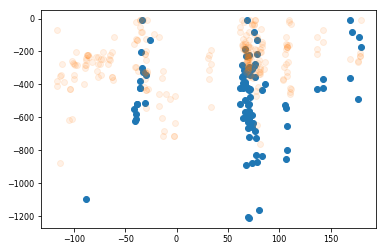

In [394]:
plt.plot(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_gt_2827_depth, 'o')
plt.plot(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_28_depth, 'o', alpha=0.1)

In [398]:
acsel = ~acrossASF.break_gt_2827_depth.isnull() & (acrossASF.SHELF_BREAK_LONGITUDE < 0)
acrossASF.loc[acsel, "SHELF_BREAK_LONGITUDE"].max()

-26.0146

In [407]:
dfmg.columns

Index(['JULD', 'LATITUDE', 'LONGITUDE', 'PLATFORM_NUMBER', 'POSITION_QC',
       'PRES_ADJUSTED', 'PRES_ADJUSTED_ERROR', 'PRES_ADJUSTED_QC',
       'PROFILE_NUMBER', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_ERROR',
       'PSAL_ADJUSTED_QC', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_ERROR',
       'TEMP_ADJUSTED_QC', 'DEPTH', 'DENSITY_INSITU', 'POT_DENSITY', 'CTEMP',
       'SA', 'DIST_GLINE', 'ECHODEPTH', 'gamman'],
      dtype='object')

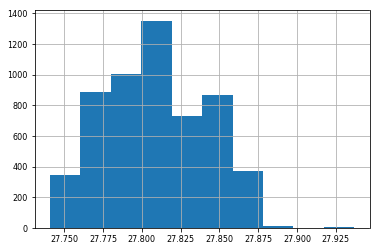

In [408]:
dfsel = (dfmg.gamman > 28.26) & (dfmg.gamman < 28.28)
dfmg.loc[dfsel, "POT_DENSITY"].hist()

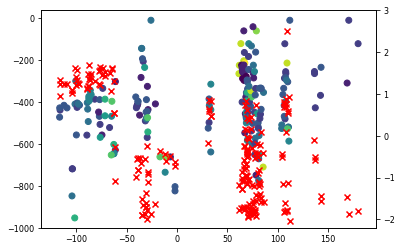

In [213]:
plt.close(1)
plt.figure(1)
ax = plt.subplot()
ax.scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_281_depth, c= acrossASF.month)
axr = ax.twinx()
axr.scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_281_CT, c= 'r', marker = 'x')
axr.set_ylim(-2.2, 3)
plt.show()

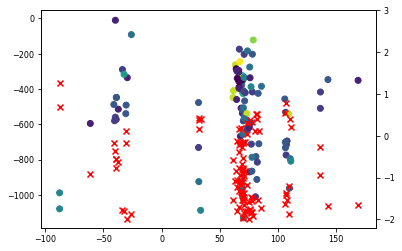

In [203]:
plt.close(1)
plt.figure(1)
ax = plt.subplot()
SCR = ax.scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_2827_depth, c=acrossASF.month)
axr = ax.twinx()
axr.scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_2827_CT, marker='x', color='r')
axr.set_ylim(-2.2, 3)
plt.show()

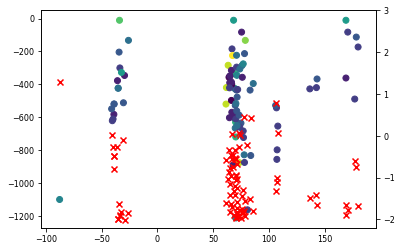

In [204]:
plt.close(1)
plt.figure(1)
ax = plt.subplot()
ax.scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_gt_2827_depth, marker='o', c=acrossASF.month)
axr = ax.twinx()
axr.scatter(acrossASF.SHELF_BREAK_LONGITUDE, acrossASF.break_gt_2827_CT, marker='x', color='r')
axr.set_ylim(-2.2, 3)
plt.show()

In [159]:
import find_shelfBreakValues as fsbv
importlib.reload(fsbv)

<module 'find_shelfBreakValues' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/find_shelfBreakValues.py'>

In [66]:
sbvalues = fsbv.findShelfBreakValues(acrossASF.loc[0], dfmg)

In [67]:
sbvalues

{'depth_28gn': -445.4152093571142,
 'depth_2827gn': -880.707345774294,
 'depth_gt2827gn': -890.8304187142284,
 'CT_28gn': 0.2080314685801017,
 'CT_2827gn': -0.7359591809920023,
 'CT_gt2827gn': -0.7371392921353531}

In [369]:
importlib.reload(fsbv)

<module 'find_shelfBreakValues' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/find_shelfBreakValues.py'>

In [370]:
acrossASF['break_28_depth'] = np.zeros(len(acrossASF))
acrossASF['break_281_depth'] = np.zeros(len(acrossASF))
acrossASF['break_2827_depth'] = np.zeros(len(acrossASF))
acrossASF['break_gt_2827_depth'] = np.zeros(len(acrossASF))

acrossASF['break_28_CT'] = np.zeros(len(acrossASF))
acrossASF['break_281_CT'] = np.zeros(len(acrossASF))
acrossASF['break_2827_CT'] = np.zeros(len(acrossASF))
acrossASF['break_gt_2827_CT'] = np.zeros(len(acrossASF))

acrossASF['SHELF_BREAK_LONGITUDE'] = np.zeros(len(acrossASF))

In [371]:
for i in range(len(acrossASF)):
    sbvalues = fsbv.findShelfBreakValues(acrossASF.loc[i], dfmg)
    
    acrossASF.loc[i, 'break_28_depth'] = sbvalues['depth_28gn']
    acrossASF.loc[i, 'break_281_depth'] = sbvalues['depth_281gn']
    acrossASF.loc[i, 'break_2827_depth'] = sbvalues['depth_2827gn']
    acrossASF.loc[i, 'break_gt_2827_depth'] = sbvalues['depth_gt2827gn']

    acrossASF.loc[i, 'break_28_CT'] = sbvalues['CT_28gn']
    acrossASF.loc[i, 'break_281_CT'] = sbvalues['CT_281gn']
    acrossASF.loc[i, 'break_2827_CT'] = sbvalues['CT_2827gn']
    acrossASF.loc[i, 'break_gt_2827_CT'] = sbvalues['CT_gt2827gn']
    acrossASF.loc[i, 'SHELF_BREAK_LONGITUDE'] = sbvalues['SHELF_BREAK_LONGITUDE']
    

67.69789675399065 67.04085599106651 -212.58453173862267 -668.1228140356714 -890.8304187142284
69.69320996315655 6.079513866182324 -232.77762539359196 nan nan
68.22361061905265 60.93322966479743 -203.37051624334015 -508.4262906083504 -579.6059712935195
69.41556542314163 22.76962001409185 -202.84598661759378 -537.5418645366237 -608.5379598527816
69.7317 13.384089492706092 -234.74662569246368 nan nan
68.78118984399251 10.28574822979169 -233.35118096086512 -375.39103024139166 nan
68.6666 2.034041608804715 -254.10303246631304 -711.4884909056763 nan
68.39970196074856 52.874064922288085 -315.95711903580525 -927.4870268470414 nan
69.34592179093161 37.5881810672541 -234.0479211055092 -997.2476638408658 nan
69.52033702348297 13.558089909372448 -293.5702098544157 -961.6955150403273 nan
69.6183 6.342993853910842 -312.643204712851 -655.5422034301713 -665.6274680983278
69.5016 50.923954413007465 -253.8194078879293 -994.9720789206826 nan
69.7676 46.99934733382145 -312.2246955069131 -1007.176437119074

108.6136 24.257104796693895 -265.31406455255444 nan nan
108.8327 6.140354662538186 nan nan nan
110.2935 129.09608469119578 -458.65698830482927 nan nan
110.5181 134.40201741053548 -448.46461078694415 -795.0054463950373 nan
107.8637 145.4339933800799 -325.9085587725922 nan nan
110.9732 124.21465417260124 -424.78968654041137 -809.1232124579262 nan
109.5807 22.579905974161786 -20.310913631885228 nan nan
109.1025 0.0 -10.201528213742336 -540.6809953283446 nan
142.368 22.36199755163553 -143.27420236025057 nan -419.5887354835909
137.1834 0.0 -213.83603263984185 nan nan
136.3737 10.63317594981122 -112.10212784643625 -509.5551265747099 nan
136.459 4.542823017305126 -183.10142790134307 -417.06436355305925 -427.2366651031339
142.9194 74.96322290105483 -71.3677892192535 -346.6435476363739 -367.03434455616065
178.9408 458.798153286363 -225.52210355402434 nan nan
176.6825 378.1494760704143 -264.88756001522404 nan -489.0231877204136
179.1509 385.56708360071923 -206.5116478871256 nan nan
178.9408 0.0 

In [143]:
[].any()

AttributeError: 'list' object has no attribute 'any'

In [120]:
acrossASF

,Unnamed: 0,REGION,PROFILE_NUMBERS,POSITION_LABEL,LEVELS,month,zonal,merid,wek,echodepth,SHELF_BREAK_ind,break_28_depth,break_2827_depth,break_gt_2827_depth,break_28_CT,break_2827_CT,break_gt_2827_CT,SHELF_BREAK_LONGITUDE
0,0,CDP,"200006, 200420, 200419, 199992, 199991, 199990",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6, 28.9, 29.1",2,"[-1.6891721487045288, -0.7137743234634399, -0....","[4.446157932281494, 3.033881187438965, 3.03388...","[-5.9229115834114054e-08, 1.3012778765641997e-...",[ -400. -482. -1009. -2616. -2748. -2859.],2.0,-445.415209,-880.707346,-890.830419,0.208031,-0.735959,-0.737139,67.697897
1,1,CDP,"200428, 200426, 200399, 200398",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",2,"[0.13945090770721436, 0.13945090770721436, 1.4...","[4.203845977783203, 4.203845977783203, 3.40058...","[5.401435601015692e-07, 5.401435601015692e-07,...",[ -457. -980. -2361. -2709.],2.0,NaN,NaN,NaN,NaN,NaN,NaN,69.693210
2,2,CDP,"200002, 200409, 199992, 199991",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",2,"[-1.6526789665222168, -0.5551085472106934, 1.0...","[4.9525909423828125, 3.4676201343536377, 2.948...","[3.3920451869562385e-07, 2.7694684945345216e-0...",[ -514. -691. -2616. -2748.],2.0,-366.066929,-569.437445,-620.280075,-0.897311,-1.339248,-1.019963,68.223611
3,3,CDP,"200404, 200402, 200403, 200400, 200399",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",2,"[-0.225877046585083, -0.225877046585083, 0.139...","[3.850473403930664, 3.850473403930664, 4.20384...","[4.4905274876327894e-07, 4.4905274876327894e-0...",[ -418. -560. -1008. -1399. -2361.],2.0,-354.980477,-598.395661,-862.095443,-0.179277,-0.656181,-1.036426,69.415565
4,4,CDP,"96172, 200480, 200452, 96180",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",3,"[-4.3876800537109375, -4.3876800537109375, -4....","[5.092728137969971, 5.092728137969971, 5.09272...","[1.956788992174552e-06, 1.956788992174552e-06,...",[ -419. -716. -979. -1332.],3.0,NaN,NaN,NaN,NaN,NaN,NaN,69.731700
5,5,CDP,"200009, 200012, 200023",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",3,"[-6.121500492095947, -6.121500492095947, -6.12...","[4.500678062438965, 4.500678062438965, 4.50067...","[-3.774841275117069e-07, -3.774841275117069e-0...",[-553. -360. -659.],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,CDP,"94313, 200490, 200523, 94350, 94351",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",4,"[-2.3297853469848633, -2.3297853469848633, -2....","[5.137556076049805, 5.137556076049805, 5.13755...","[1.3786175259156153e-06, 1.3786175259156153e-0...",[ -493. -785. -1895. -2261. -2574.],2.0,NaN,NaN,NaN,NaN,NaN,NaN,68.781190
7,7,CDP,"200522, 94348, 94351, 94355",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",4,"[-2.3297853469848633, -2.3297853469848633, -1....","[5.137556076049805, 5.137556076049805, 3.62593...","[1.3786175259156153e-06, 1.3786175259156153e-0...",[ -705. -1971. -2574. -2788.],1.0,NaN,NaN,NaN,NaN,NaN,NaN,68.666600
8,8,CDP,"200042, 200537, 200519, 94351",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",4,"[-2.9188318252563477, -2.795072555541992, -2.7...","[7.153190612792969, 4.828607559204102, 4.82860...","[1.1550820318007027e-06, 1.10078963189153e-06,...",[ -424. -869. -1399. -2574.],2.0,NaN,NaN,NaN,NaN,NaN,NaN,68.399702
9,9,CDP,"92514, 200569, 200566, 200597, 200598, 92528, ...",NaN,"27.75, 28, 28.1, 28.27, 28.4, 28.6",5,"[-4.271457672119141, -4.9533233642578125, -4.9...","[9.00364875793457, 6.586179733276367, 6.586179...","[2.347447434658534e-06, 2.0336060515546706e-06...",[ -336. -390. -645. -1130. -1336. -1704. -18...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,69.345922


In [87]:
dfmg.loc[dfmg.PROFILE_NUMBER.isin([1]), 'LONGITUDE'].values[0]

78.3797

In [ ]:
acrossASF = pd.read_excel("AcrossSlopeTransects.xlsx")

In [104]:
i = 86
p = 3
profs = acrossASF.iloc[i].PROFILE_NUMBERS
profs = [int(x) for x in profs.split(',')]
gamman = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), 'gamman'].values
ctemp = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), 'CTEMP'].values
depth = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), 'DEPTH'].values

gamma_interp_fun = interpolate.interp1d(depth, gamman)
ctemp_interp_fun = interpolate.interp1d(depth, ctemp)

depth_hires = np.linspace(np.min(depth), np.max(depth)+1, 100)
gamman_interpd = gamma_interp_fun(depth_hires[0:-1])
gamman_interpd = np.append(gamman_interpd, gamman_interpd[-1])
ctemp_interpd = ctemp_interp_fun(depth_hires[0:-1])
ctemp_interpd = np.append(ctemp_interpd, ctemp_interpd[-1])

try:
    print("yn>28[-1]", depth_hires[(gamman_interpd > 28)][-1], ctemp_interpd[gamman_interpd > 28][-1])
    print("yn > 28.27[0]", depth_hires[(gamman_interpd > 28.27)][0], ctemp_interpd[gamman_interpd > 28.27][0])
except:
    pass

yn>28[-1] -59.480567360554176 -1.626716410952493
yn > 28.27[0] -454.89974010215866 -1.8777137981842733


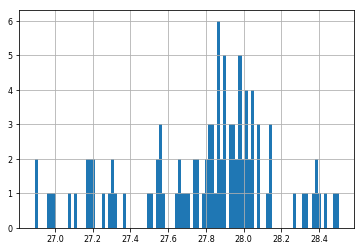

In [105]:
dfmg.loc[dfmg.PROFILE_NUMBER.isin(profs)].gamman.hist(bins=100)
plt.show()

In [106]:
dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), ['gamman', 'CTEMP', 'PSAL_ADJUSTED', 'DEPTH']]

,gamman,CTEMP,PSAL_ADJUSTED,DEPTH
659087,27.552286,-0.612035,34.016003,-5.939992
659088,27.554085,-0.616920,34.017624,-9.899890
659089,27.557023,-0.624211,34.020313,-19.799300
659090,27.573442,-0.647276,34.036263,-29.698229
659091,27.644983,-0.741026,34.106583,-35.637356
659092,27.730944,-0.862006,34.191826,-37.617026
659093,27.840809,-1.116236,34.299751,-39.596678
659094,27.946761,-1.455010,34.401733,-41.576310
659095,27.981318,-1.597266,34.430233,-43.555923
659096,27.989324,-1.632125,34.435810,-49.494646


In [61]:
dfmg.columns

Index(['JULD', 'LATITUDE', 'LONGITUDE', 'PLATFORM_NUMBER', 'POSITION_QC',
       'PRES_ADJUSTED', 'PRES_ADJUSTED_ERROR', 'PRES_ADJUSTED_QC',
       'PROFILE_NUMBER', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_ERROR',
       'PSAL_ADJUSTED_QC', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_ERROR',
       'TEMP_ADJUSTED_QC', 'DEPTH', 'DENSITY_INSITU', 'POT_DENSITY', 'CTEMP',
       'SA', 'DIST_GLINE', 'ECHODEPTH', 'gamman'],
      dtype='object')

In [51]:
omega = 2. * np.pi / (3600*24)

In [50]:
SA = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), "SA"]
CT = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), "CTEMP"]
pres = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), "PRES_ADJUSTED"]
lat = dfmg.loc[dfmg.PROFILE_NUMBER.isin([profs[p]]), "LATITUDE"].values[0]
gsw.Nsquared(SA, CT, pres, lat)

(array([5.47766448e-06, 1.51761981e-06, 1.02928823e-06, 1.53086608e-05,
        4.50459458e-06, 7.54629290e-06, 1.86255627e-06, 1.13244111e-05,
        1.64653580e-06, 1.78566111e-06, 8.16245853e-06, 3.89094370e-07,
        4.81957010e-06, 1.25209551e-06, 1.57817131e-08, 5.75086211e-08]),
 array([  8.,  15.,  35.,  75., 150., 250., 340., 390., 416., 466., 516.,
        537., 547., 554., 574., 629.]))

In [54]:
(2. * omega * np.sin( np.deg2rad(lat) ))

-0.00013367021278159306

In [59]:
rossby_radius = np.sqrt(8e-6) * 1e3 / (2. * omega * np.sin( np.deg2rad(lat) ))

In [60]:
print(rossby_radius)

-21159.741320735564


In [91]:
def find_28gnDepth(gdf):
    gamman = gdf.gamman.values
    ctemp = gdf.CTEMP.values
    depth = gdf.DEPTH.values

    gamma_interp_fun = interpolate.interp1d(depth, gamman)
    ctemp_interp_fun = interpolate.interp1d(depth, ctemp)

    depth_hires = np.linspace(np.min(depth), np.max(depth)+1, 100)
    gamman_interpd = gamma_interp_fun(depth_hires[0:-1])
    ctemp_interpd = ctemp_interp_fun(depth_hires[0:-1])
    try:
        return depth_hires[gamman_interpd > 28][-1], ctemp_interpd[gamman_interpd > 28][-1]
    except:
        return np.nan, np.nan

for i in range(0, len(acrossASF) ):
    profs = acrossASF.iloc[i].PROFILE_NUMBERS
    profs = [int(x) for x in profs.split(',')]
    dfselect = dfmg.PROFILE_NUMBER.isin(profs)
    
    dfselect2 = (dfmg.ECHODEPTH < -800) & (dfmg.ECHODEPTH > -1200)
    
    gn28Depth = dfmg.loc[dfselect & dfselect2].groupby("PROFILE_NUMBER").apply(find_28gnDepth)
    
    try:
        acrossASF.loc[i, "gn28Depth"] = gn28Depth.values[0][0]
        acrossASF.loc[i, "gn28CT"] = gn28Depth.values[0][1]
    except:
        continue

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 99
  del sys.path[0]


In [95]:
acrossASF.groupby("REGION").mean()

,month,gn28Depth,gn28CT
REGION,,,
AC,3.200000,-273.303229,-1.232181
AS,4.125000,-522.412104,0.881882
BS,5.000000,-342.506361,1.367991
CDP,4.673913,-315.200420,-0.913061
EPB,4.333333,-485.531612,-1.230877
KC,4.666667,-324.329188,-0.838429
LAC,5.000000,-339.783788,-1.366565
PHC,4.714286,-358.834085,-0.236373
PMC,6.200000,-705.147491,-1.024137


In [1]:
import cartopy.crs as ccrs

In [92]:
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_topView_contourf.py'>

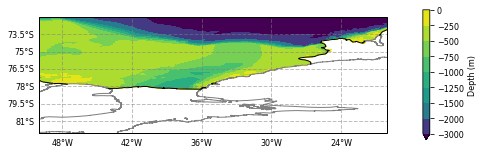

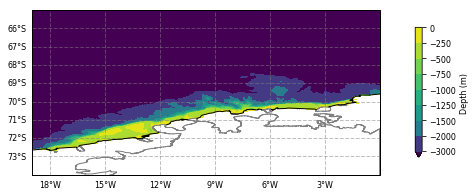

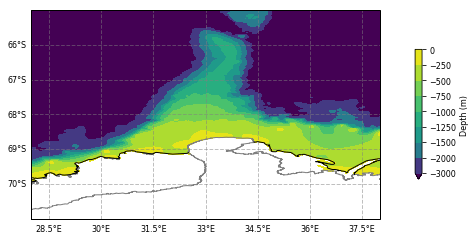

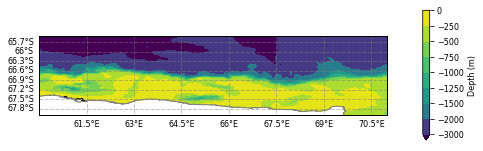

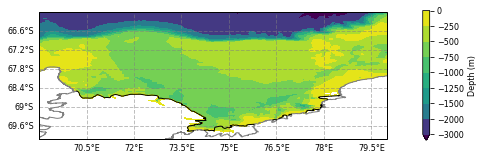

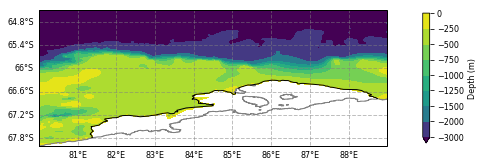

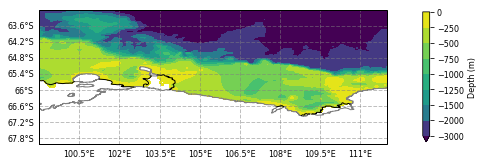

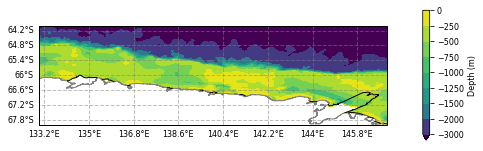

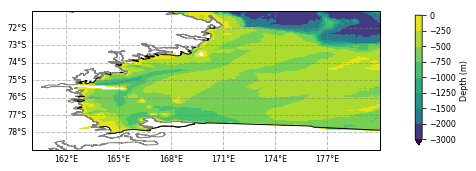

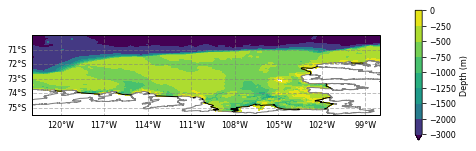

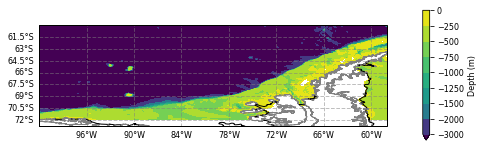

In [98]:
regions = ["WS", "PMC", "PHC", "CDP", "WPB", "LAC", "KC", "AC", "RS", "AS", "BS"]
for r in regions:
    topView.plot_region_bathy(region=r, bathy=bathy, levs=[-3000, -2000, -1500, -1250, -1000, -750, -500, -250, 0], 
                             save=True, savename="./Images/dataDensity/"+r+"_bathy.png")

In [2]:
plt.close(1)
plt.figure(1)
dfmg.loc[Harald & sel_years(dfmg, [2008]) & ~dfmg.CTEMP.isnull() & (dfmg.ECHODEPTH < -1000), "JULD"].hist()
plt.xticks(rotation="90")
plt.show()

NameError: name 'plt' is not defined

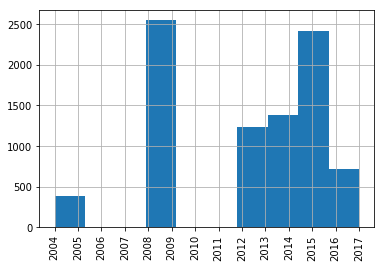

In [32]:
plt.close(1)
plt.figure(1)
dfmg.loc[Harald & ~dfmg.CTEMP.isnull() & (dfmg.ECHODEPTH < -1000) , "JULD"].dt.year.hist()
plt.xticks(np.arange(2004, 2018), rotation="90")
plt.show()

In [277]:
windEk

<xarray.Dataset>
Dimensions:     (latitude: 40, longitude: 480, time: 168)
Coordinates:
  * longitude   (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude    (latitude) float32 -60.0 -60.75 -61.5 -62.25 -63.0 -63.75 ...
  * time        (time) datetime64[ns] 2004-01-01 2004-02-01 2004-03-01 ...
Data variables:
    stressCurl  (time, latitude, longitude) float32 -1.83052e-09 ...
    wek         (time, latitude, longitude) float32 1.41783e-08 4.6816e-09 ...

In [321]:
windEk.sel(time=[np.datetime64('2008-02-02'), np.datetime64('2008-02-02')], 
           latitude=[-74, -75], longitude=[74, 80], method='nearest').wek.shape

(2, 2, 2)

In [327]:
windEk.sel(time = str(year)+"-{0:-02d}".format(month)+"-01")

<xarray.Dataset>
Dimensions:     (latitude: 40, longitude: 480)
Coordinates:
  * longitude   (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
  * latitude    (latitude) float32 -60.0 -60.75 -61.5 -62.25 -63.0 -63.75 ...
    time        datetime64[ns] 2008-01-01
Data variables:
    stressCurl  (latitude, longitude) float32 -1.60133e-08 -1.64706e-08 ...
    wek         (latitude, longitude) float32 1.24031e-07 1.27573e-07 ...

In [263]:
stress_curl

<xarray.DataArray (time: 168, latitude: 40, longitude: 480)>
array([[[ -1.830524e-09,  -6.044289e-10, ...,  -1.964502e-08,  -1.945737e-08],
        [  9.283511e-09,   9.744178e-09, ...,  -1.799298e-08,  -1.858613e-08],
        ..., 
        [ -9.032390e-09,  -9.284923e-09, ...,  -8.868009e-09,  -9.120424e-09],
        [ -1.044821e-08,  -1.042622e-08, ...,  -1.110646e-08,  -1.057965e-08]],

       [[  1.052166e-08,   9.223736e-09, ...,   1.964502e-08,   1.481911e-08],
        [  1.239591e-08,   1.210687e-08, ...,   1.973367e-08,   1.282736e-08],
        ..., 
        [ -1.471767e-08,  -1.485479e-08, ...,  -1.507458e-08,  -1.493716e-08],
        [ -1.617708e-08,  -1.647329e-08, ...,  -1.755989e-08,  -1.703308e-08]],

       ..., 
       [[  1.159142e-08,   1.229574e-08, ...,   5.895120e-09,   1.380549e-09],
        [  4.422778e-09,   4.853713e-09, ...,   1.161488e-08,   8.218858e-09],
        ..., 
        [ -8.901597e-09,  -9.043067e-09, ...,  -9.883900e-09,  -9.883959e-09],
        [ -

## dfmg.columns

In [15]:
dfmg[(dfmg.PROFILE_NUMBER == 436929)]

,JULD,LATITUDE,LONGITUDE,PLATFORM_NUMBER,POSITION_QC,PRES_ADJUSTED,PRES_ADJUSTED_ERROR,PRES_ADJUSTED_QC,PROFILE_NUMBER,PSAL_ADJUSTED,...,TEMP_ADJUSTED_ERROR,TEMP_ADJUSTED_QC,DEPTH,DENSITY_INSITU,POT_DENSITY,CTEMP,SA,DIST_GLINE,ECHODEPTH,gamman
3240470,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240471,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240472,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240473,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240474,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240475,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240476,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN
3240477,2012-09-29 23:10:00,-76.4862,172.9704,b'00026286',b'1',NaN,NaN,9,436929,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,246.814029,-611.0,NaN


In [17]:
mPrydz = topView.createMapProjections(-90, 0, region="Prydz")

Got the below bounding box by analyzing the profile locations in CDP using plotProfileNumber.plotProfileNumberContours(dfmg[CDP], m=mPrydz, pfno_include=['00021384']), where pfno stands for PLATFORM_NUMBER

In [150]:
importlib.reload(viewProf)

<module 'plotProfileNumber' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plotProfileNumber.py'>

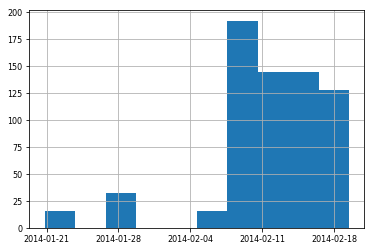

In [320]:
plt.close(1)
plt.figure(1)
boundingBox = viewProf.get_bounding_box(mPrydz, 5.97313e6, 8.83841e6, 6.0149e6, 8.8648e6)
selectProfiles = viewProf.get_box_dfselector(dfmg, [boundingBox[0], boundingBox[2]])
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2014]) ].JULD.hist()
plt.show()

In [155]:
boundingBox

[[65.83998043836696, -66.90287134503806],
 [66.787776295757, -66.90287134503806],
 [66.787776295757, -66.7090127038635],
 [65.83998043836696, -66.7090127038635]]

In [322]:
importlib.reload(profDist)

<module 'plot_profiles_vs_dist' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py'>

In [415]:
levels = [27.7, 27.8, 27.9, 28, 28.1, 28.2, 28.27, 28.35, 28.4]+list(np.arange(28.5, 29.2, 0.1))
levels

[27.7,
 27.8,
 27.9,
 28,
 28.1,
 28.2,
 28.27,
 28.35,
 28.4,
 28.5,
 28.600000000000001,
 28.700000000000003,
 28.800000000000004,
 28.900000000000006,
 29.000000000000007,
 29.100000000000009]

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


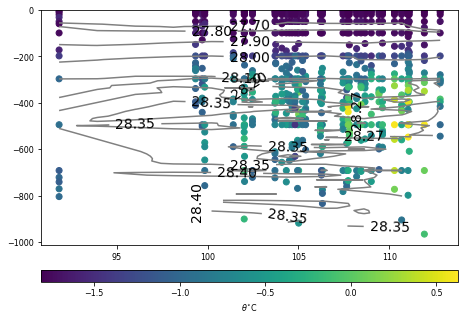

In [276]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2014) & (dfmg.JULD.dt.month == 2)
profDist.plotProfDist_in_BoundingBox(dfmg.loc[selectPeriod], boundingBox=[boundingBox[0], boundingBox[2]], 
                                     plotTimeHist=False, levels=levels, plotEcho=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


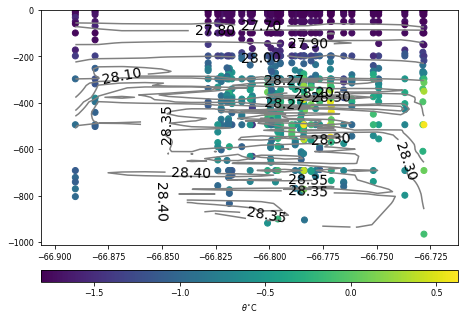

In [349]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2014) & (dfmg.JULD.dt.month == 2)
profDist.plotProfDist_in_BoundingBox(dfmg.loc[selectPeriod], boundingBox=[boundingBox[0], boundingBox[2]], 
                                     plotTimeHist=False, levels=levels, plotEcho=False, xlat=True)

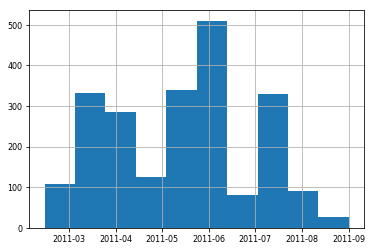

In [350]:
plt.close(1)
plt.figure(1)
boundingBox2 = viewProf.get_bounding_box(mPrydz, 6115471.6818 , 8857416.02885, 6141685.79287 , 8885655.77577)
boundingBox2 = [ boundingBox2[0], boundingBox2[2] ]
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox2)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist()
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


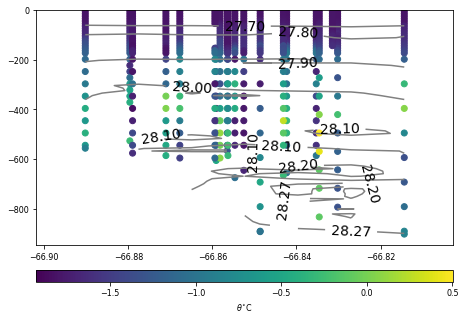

In [353]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 3)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, 
                                     levels=levels, xlat=True)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


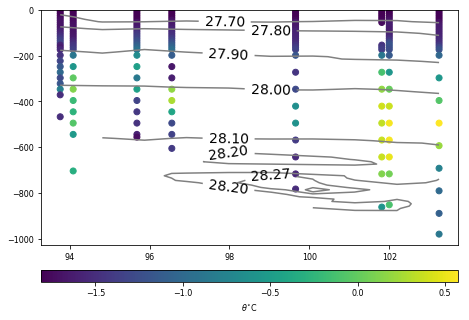

In [354]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


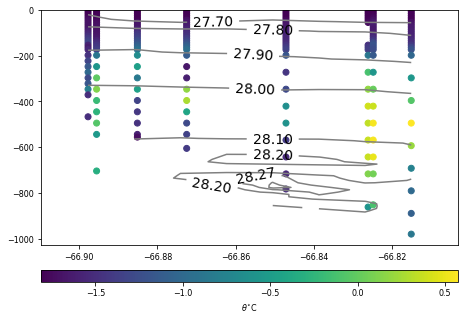

In [355]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, 
                                     levels=levels, xlat=True)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


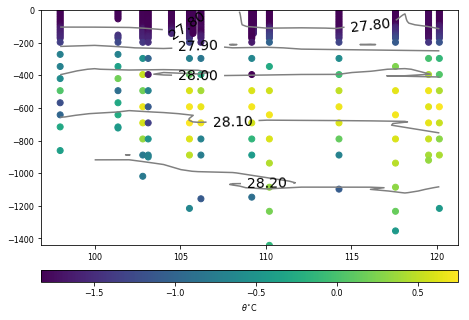

In [356]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


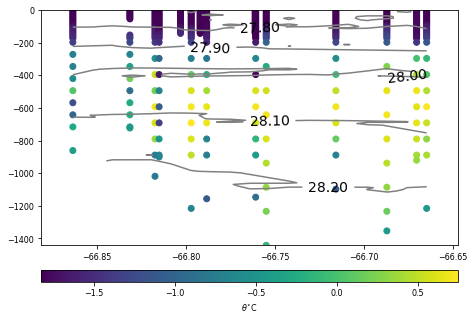

In [357]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, 
                                     levels=levels, xlat=True)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


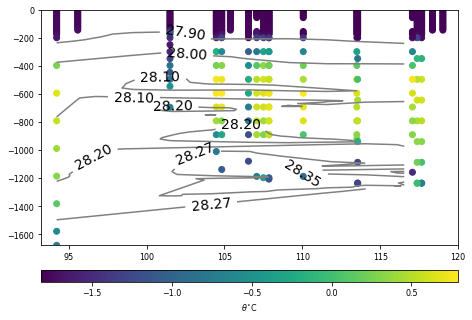

In [281]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


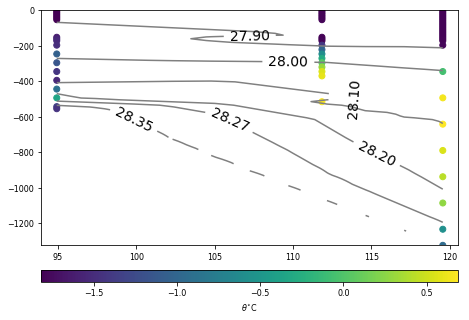

In [282]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

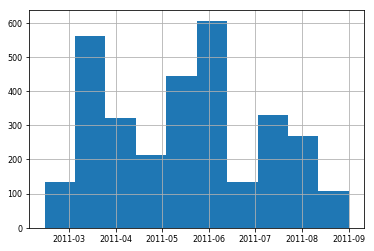

In [283]:
boundingBox3 = [[69.03487386835869, -66.98537146578394], [69.76838268643952, -66.54203221189445] ]
plt.close(1)
plt.figure(1)
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox3)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist()
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


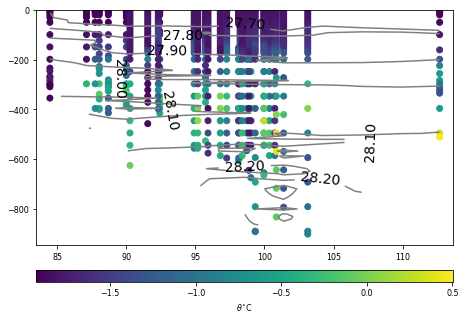

In [284]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 3)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


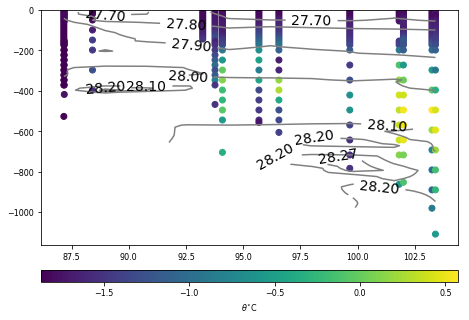

In [285]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


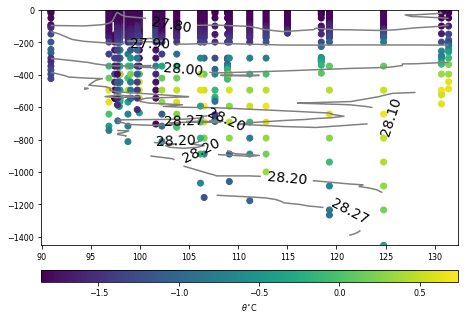

In [286]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 5)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


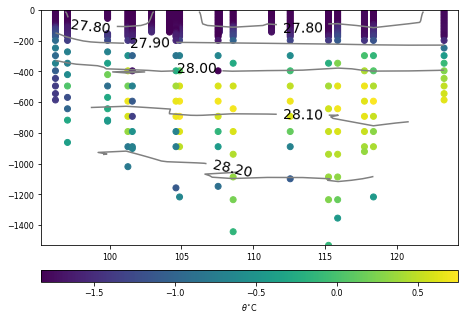

In [199]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


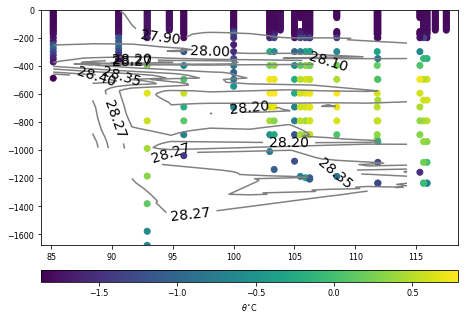

In [202]:
boundingBox = [[69.03487386835869, -66.98537146578394], [69.76838268643952, -66.54203221189445] ]
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


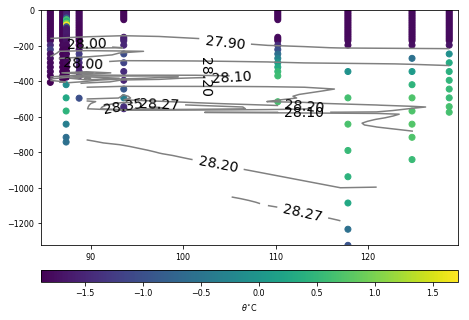

In [203]:
boundingBox = [[69.03487386835869, -66.98537146578394], [69.76838268643952, -66.54203221189445] ]
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox, plotTimeHist=False, levels=levels)

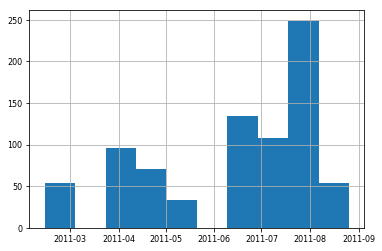

In [204]:
boundingBox4 = [[68.569779989595, -67.01124062294747], [68.91110100858128, -66.73031572879327]]
plt.close(1)
plt.figure(1)
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox4)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist()
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


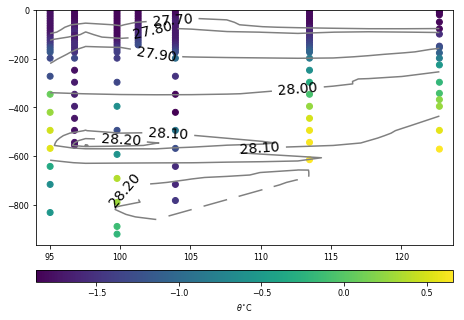

In [205]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox4, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


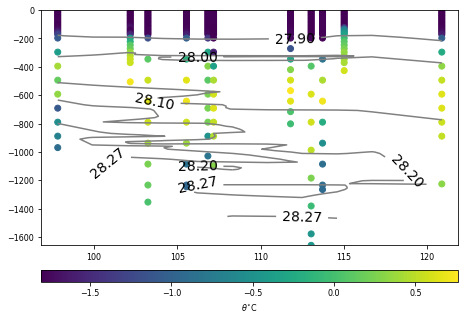

In [206]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox4, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


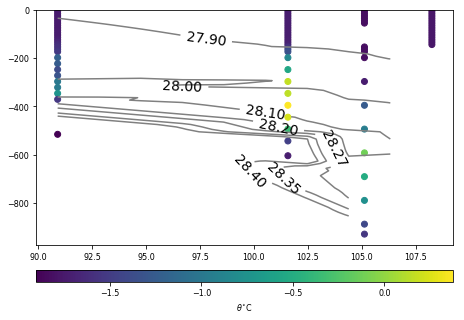

In [207]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox4, plotTimeHist=False, levels=levels)

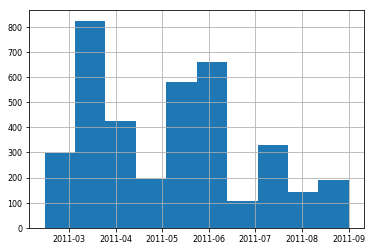

In [208]:
boundingBox5 = [[69.06858067227954, -66.93977011744948], [70.07595848160302, -66.60389561121683]]
plt.close(1)
plt.figure(1)
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox5)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist() #
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


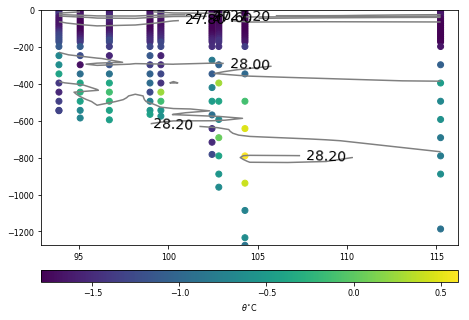

In [209]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 2)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


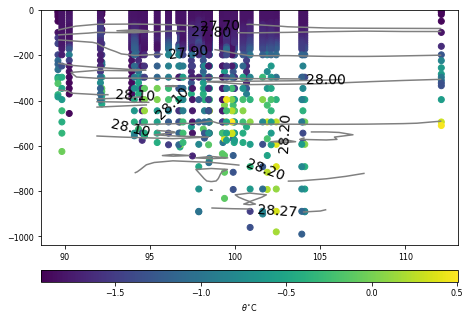

In [211]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 3)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


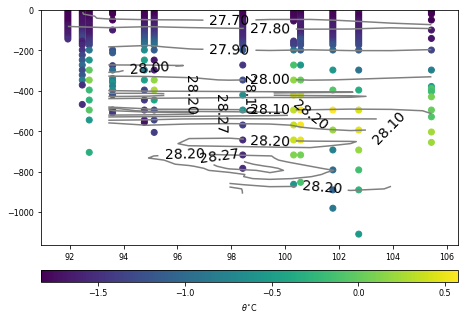

In [212]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


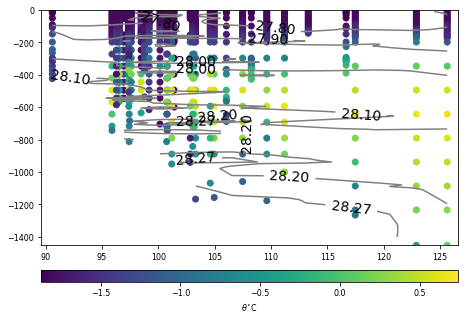

In [213]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 5)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


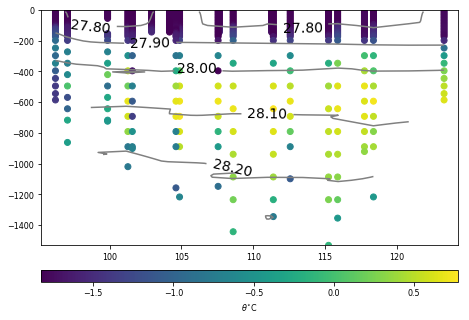

In [214]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


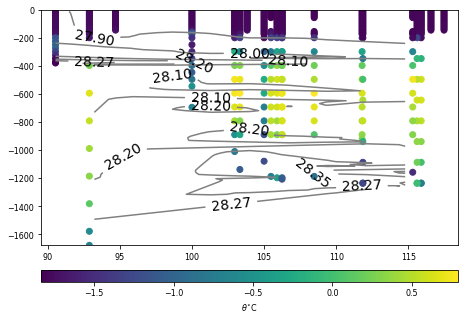

In [216]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


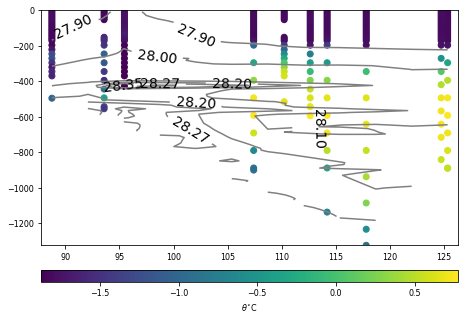

In [217]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)